## Task 1: Term Deposit Subscription Prediction (Bank Marketing)

Problem Statement: 
        The objective is to predict whether a bank customer will subscribe to a term deposit after a marketing campaign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Explainable AI
import shap


c:\Users\Shahroz\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Check Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# UCI dataset typically has no nulls.

Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.shape

(11162, 17)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# Step by step Encoding of Categorical Features
binary_cols = ['default', 'housing', 'loan', 'deposit']

for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

In [12]:
# # One-Hot Encode Nominal Columns
# nominal_cols = ['job','marital','education','contact','month','poutcome']

# data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

categorical_cols = data.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [13]:
# print(data.columns.tolist())

In [14]:
# # One-Hot Encode Nominal Columns
# nominal_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
# existing_cols = [col for col in nominal_cols if col in data.columns]

# data = pd.get_dummies(data, columns=existing_cols, drop_first=True)

# Exploratory Data Analysis (EDA)

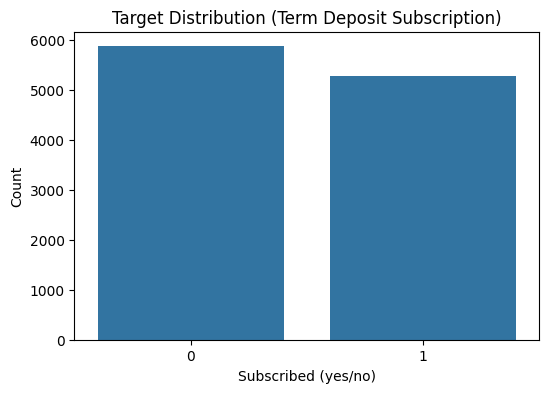

In [15]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=data)
plt.title('Target Distribution (Term Deposit Subscription)')
plt.xlabel('Subscribed (yes/no)')
plt.ylabel('Count')
plt.show()

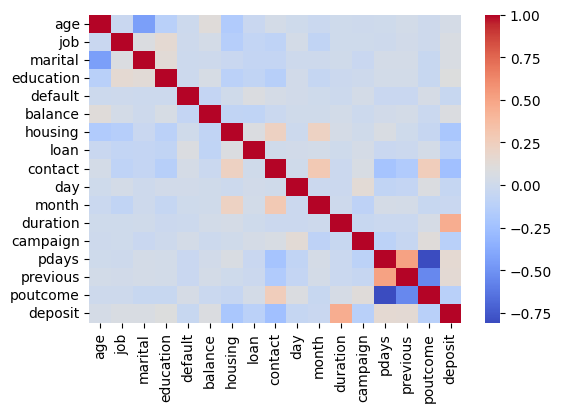

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

In [17]:
X = data.drop('deposit', axis=1)
y = data['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
# Model 1 – Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

c:\Users\Shahroz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Model 2 – Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Model Evaluation

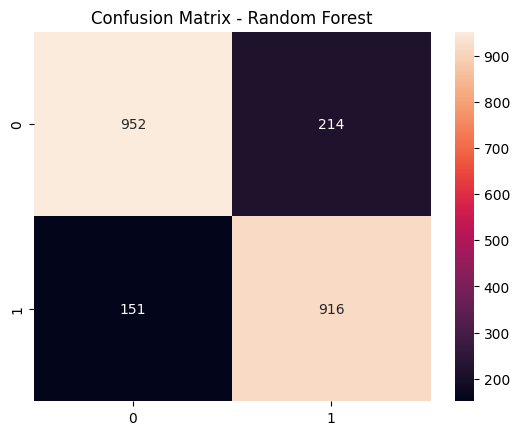

In [ ]:
# using confusion matrix for random forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [23]:
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1)

F1 Score: 0.8338643604915794


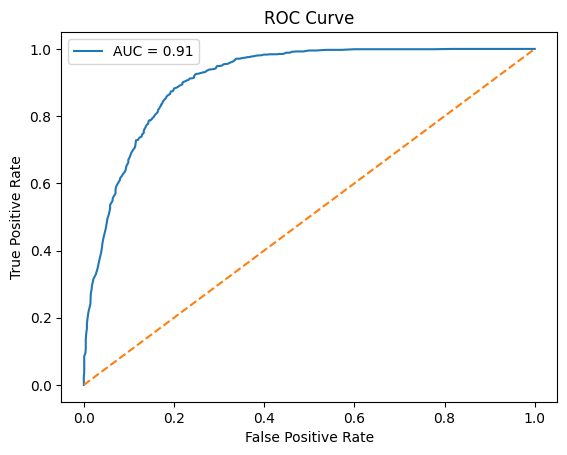

In [24]:
y_probs = rf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


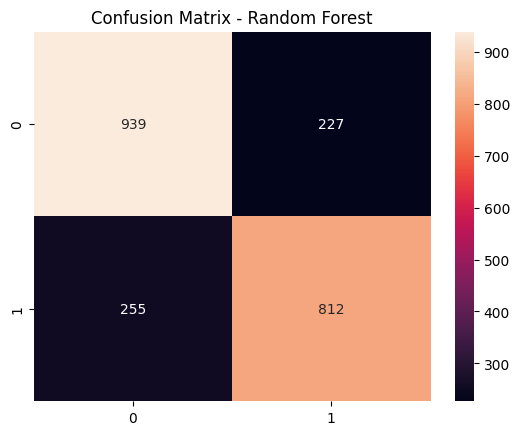

In [ ]:
# using confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [26]:
f1 = f1_score(y_test, y_pred_lr)
print("F1 Score:", f1)

F1 Score: 0.7711301044634378


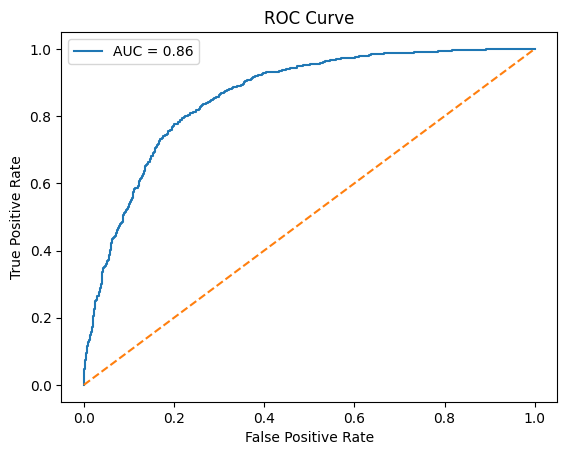

In [27]:
y_probs = lr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

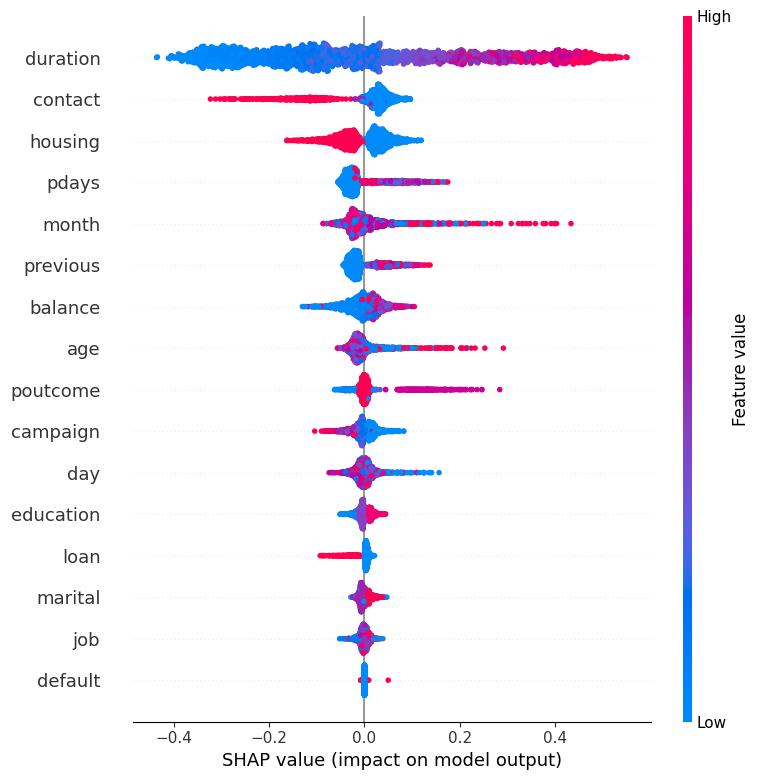

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# For class 1 (subscribed)
shap.summary_plot(shap_values[:, :, 1], X_test)

In [33]:
# for i in range(5):
#     shap.force_plot(
#         explainer.expected_value[1],
#         shap_values[1][i],
#         X_test.iloc[i]
#     )
# # 

100%|===================| 4458/4466 [04:39<00:00]        

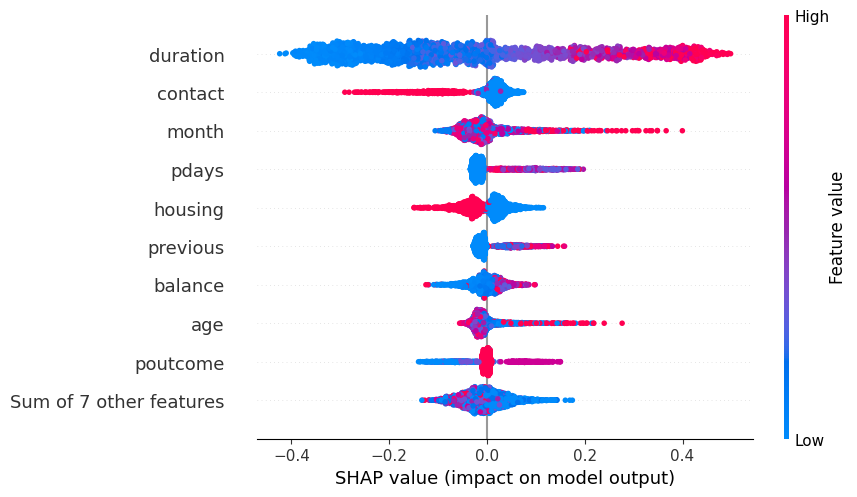

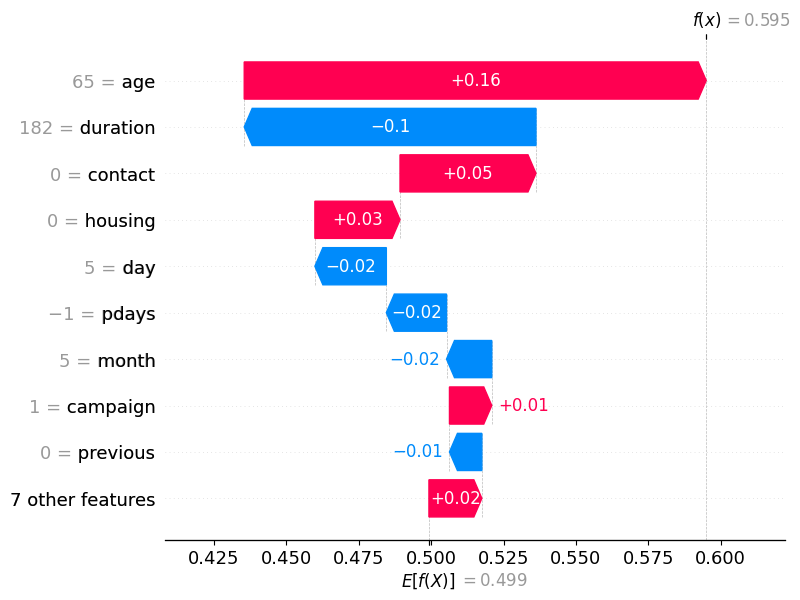

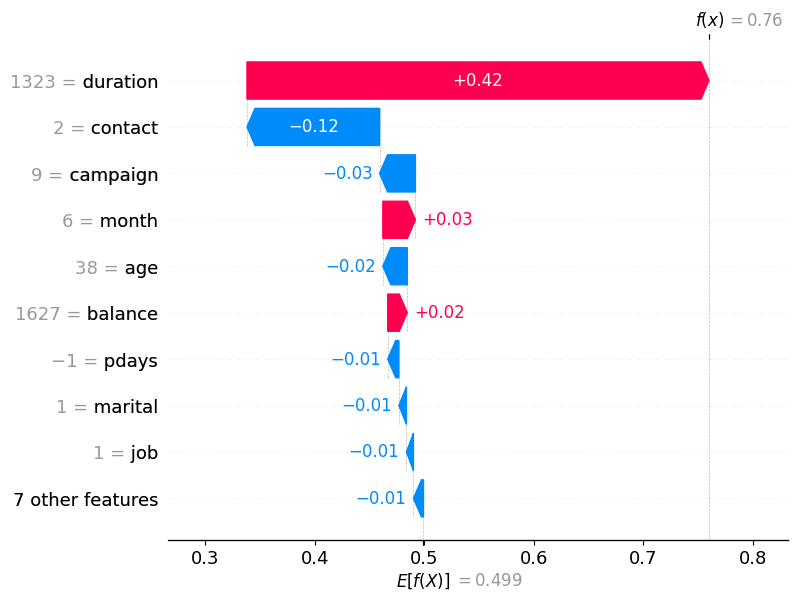

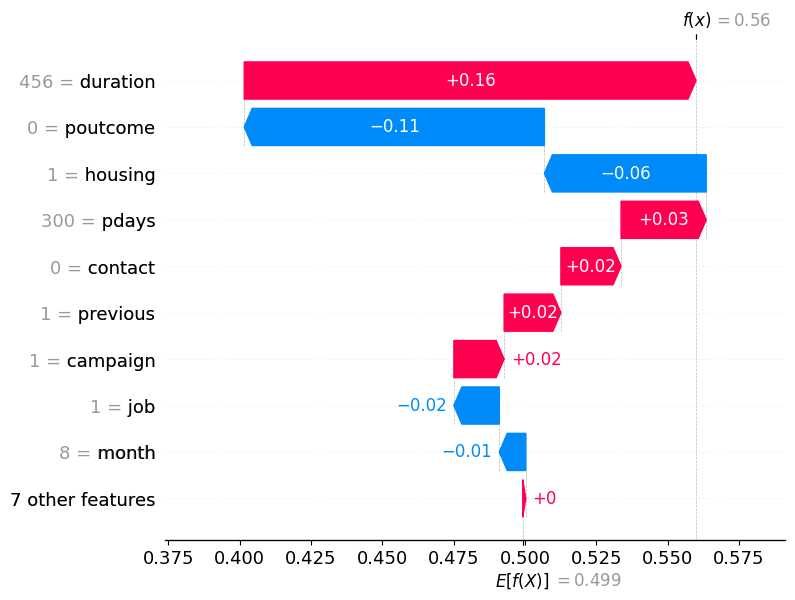

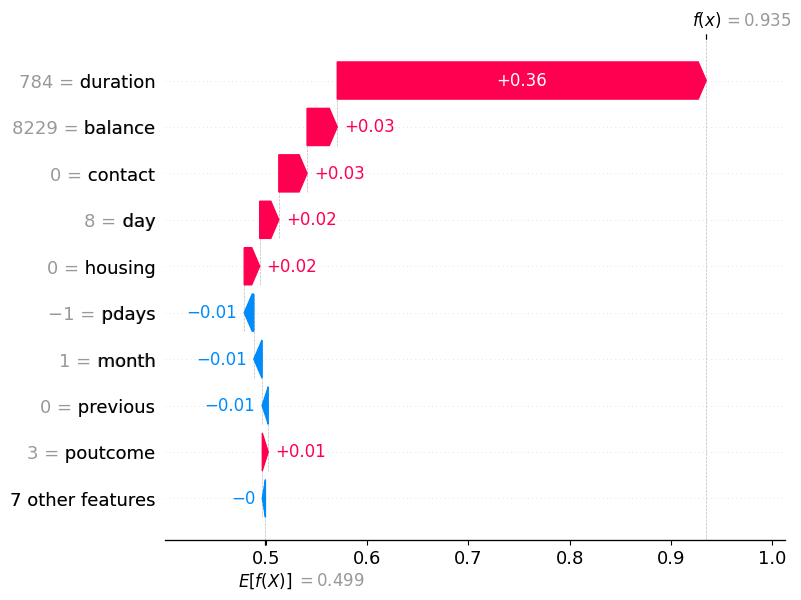

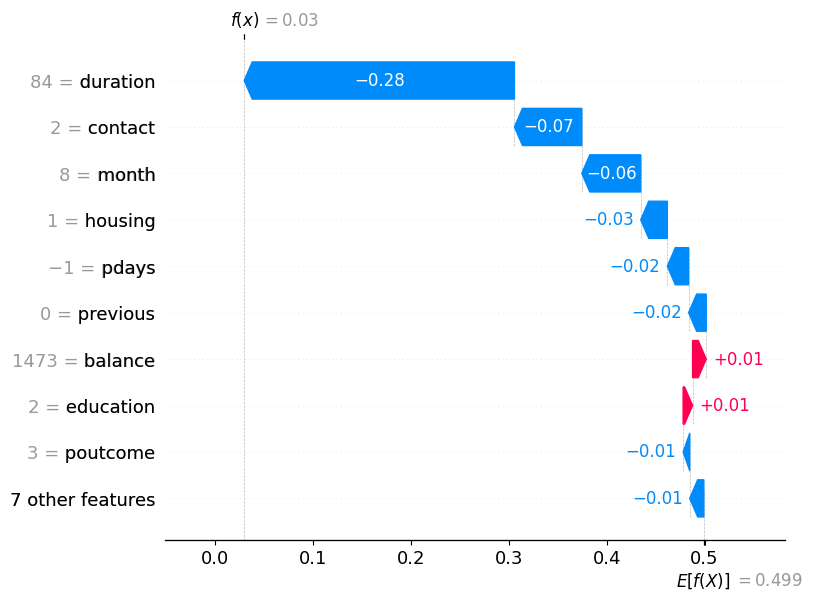

In [37]:
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

# Select class 1
shap_values_class1 = shap_values[:, :, 1]

# Summary
shap.plots.beeswarm(shap_values_class1)

# Individual explanations
for i in range(5):
    shap.plots.waterfall(shap_values_class1[i])